In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob

sns.set_theme("notebook")

In [20]:
baselines = pd.read_csv(
    "./ablations/baselines/NVIDIAGeForceRTX4070Ti_dinov2_bs32_.csv", index_col=0
)
dinovitb = baselines.iloc[1, :]
dinovitb

Parameters       8.658048e+07
Depth            1.200000e+01
Embedding Dim    7.680000e+02
Mean (ms)        8.544906e+01
Median (ms)      8.543608e+01
IQR (ms)         1.958780e-01
Name: 1, dtype: float64

# RTX 4070Ti, BS=32 Benchmarks

## Fixed Bottleneck

In [77]:
fixed_bn3 = pd.read_csv(
    "./ablations/fixed_bnsize/NVIDIAGeForceRTX4070Ti_compvitb14_bs32_bnsz3_.csv",
    index_col=0,
)

### Fixed Location

In [78]:
loc_5_data = fixed_bn3.loc[fixed_bn3["bottleneck_locs"] == 5]
loc_5_data

,Parameters,Depth,Embedding Dim,num_compressed_tokens,bottleneck_locs,bottleneck_size,bottleneck,Mean (ms),Median (ms),IQR (ms)
20,100874496,12,768,8,5,3,conv_bottleneck,48.331681,48.343712,0.130792
21,100880640,12,768,16,5,3,conv_bottleneck,50.118828,49.936767,0.206301
22,100892928,12,768,32,5,3,conv_bottleneck,53.586873,53.280296,1.072211
23,100917504,12,768,64,5,3,conv_bottleneck,60.702771,60.356709,0.660198
24,100966656,12,768,128,5,3,conv_bottleneck,74.791897,74.753321,0.425602


In [79]:
x = np.array([*loc_5_data["num_compressed_tokens"].tolist(), "baseline\n(256)"])
y = np.array([*loc_5_data["Median (ms)"].tolist(), dinovitb["Median (ms)"]])
y_perc = ((y - y[-1]) / y[-1]) * 100
x, y, y_perc

(array(['8', '16', '32', '64', '128', 'baseline\n(256)'], dtype='<U21'),
 array([48.343712  , 49.936767  , 53.28029601, 60.356709  , 74.75332101,
        85.4360775 ]),
 array([-43.41534231, -41.55072604, -37.63723995, -29.35454112,
        -12.50380027,   0.        ]))

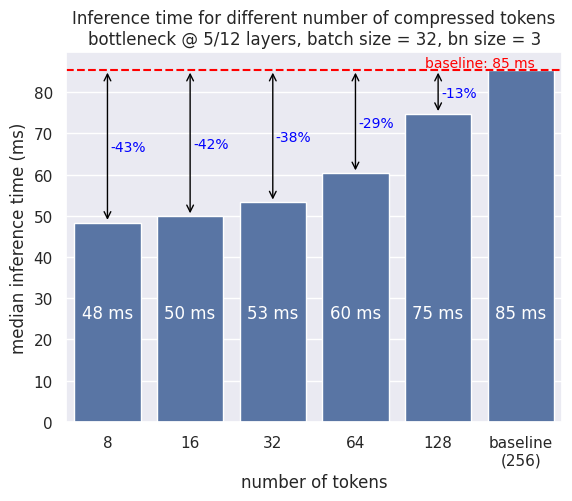

In [80]:
ax = sns.barplot(x=x, y=y)

plt.xlabel("number of tokens")
plt.ylabel("median inference time (ms)")
plt.title(
    "Inference time for different number of compressed tokens\nbottleneck @ 5/12 layers, batch size = 32, bn size = 3"
)
plt.axhline(y[-1], color="red", linestyle="--")
# Add label above the horizontal line
plt.text(
    len(x) - 1.5,
    y[-1],
    f"baseline: {y[-1]:.0f} ms",
    ha="center",
    va="bottom",
    color="red",
    fontsize=10,
)

# Add labels in the middle of the bars
for i, (v, v_perc) in enumerate(zip(y, y_perc)):
    ax.annotate(
        f"{v:.0f} ms",
        xy=(i, min(y) / 2),
        ha="center",
        va="bottom",
        color="white",
        fontsize=12,
    )

    if i < len(x) - 1:
        ax.annotate(
            "",
            xy=(i, v),
            xytext=(i, y[-1]),
            arrowprops=dict(arrowstyle="<->", color="black"),
        )
        ax.annotate(
            f"{v_perc:.0f}%",
            xy=(i + 0.25, ((y[-1] - v) / 2) + v - 2),
            ha="center",
            va="bottom",
            color="blue",
            fontsize=10,
        )

### Fixed Compressed Tokens

In [81]:
comp_32_data = fixed_bn3.loc[fixed_bn3["num_compressed_tokens"] == 32]
comp_32_data

,Parameters,Depth,Embedding Dim,num_compressed_tokens,bottleneck_locs,bottleneck_size,bottleneck,Mean (ms),Median (ms),IQR (ms)
2,100892928,12,768,32,1,3,conv_bottleneck,27.766234,27.770368,0.082813
7,100892928,12,768,32,2,3,conv_bottleneck,34.577120,34.501403,0.605299
12,100892928,12,768,32,3,3,conv_bottleneck,40.659934,40.551860,0.164445
17,100892928,12,768,32,4,3,conv_bottleneck,46.758651,46.761117,0.182205
22,100892928,12,768,32,5,3,conv_bottleneck,53.586873,53.280296,1.072211
27,100892928,12,768,32,6,3,conv_bottleneck,61.323659,60.881212,1.325299
32,100892928,12,768,32,7,3,conv_bottleneck,66.194310,65.925395,1.438243
37,100892928,12,768,32,8,3,conv_bottleneck,72.379775,71.926606,1.443227
42,100892928,12,768,32,9,3,conv_bottleneck,78.446601,78.031675,1.141067
47,100892928,12,768,32,10,3,conv_bottleneck,84.649036,84.534132,0.674042


In [82]:
x = np.array([*comp_32_data["bottleneck_locs"].tolist(), "base-\nline"])
y = np.array([*comp_32_data["Median (ms)"].tolist(), dinovitb["Median (ms)"]])
y_perc = ((y - y[-1]) / y[-1]) * 100
x, y, y_perc

(array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
        'base-\nline'], dtype='<U21'),
 array([27.7703679 , 34.501403  , 40.55186   , 46.76111651, 53.28029601,
        60.881212  , 65.925395  , 71.926606  , 78.0316755 , 84.53413199,
        94.096085  , 85.4360775 ]),
 array([-67.49573633, -59.61729048, -52.53543797, -45.26771608,
        -37.63723995, -28.74062833, -22.83658505, -15.81237328,
         -8.66659872,  -1.05569629,  10.13624192,   0.        ]))

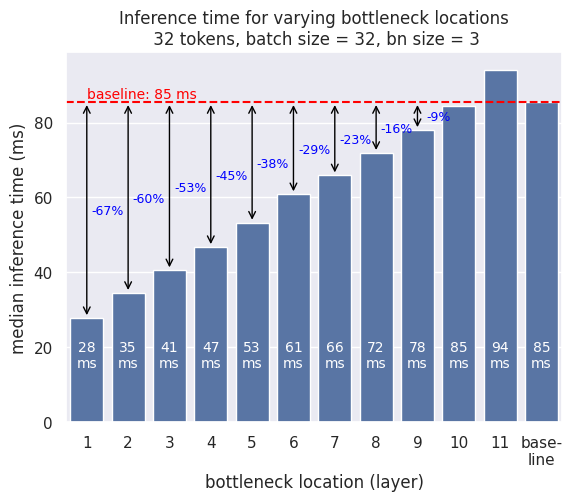

In [83]:
ax = sns.barplot(x=x, y=y)

plt.xlabel("bottleneck location (layer)")
plt.ylabel("median inference time (ms)")
plt.title(
    "Inference time for varying bottleneck locations\n 32 tokens, batch size = 32, bn size = 3"
)
plt.axhline(y[-1], color="red", linestyle="--")
# Add label above the horizontal line
plt.text(
    0,
    y[-1] + 0.25,
    f"baseline: {y[-1]:.0f} ms",
    ha="left",
    va="bottom",
    color="red",
    fontsize=10,
)

# Add labels in the middle of the bars
for i, (v, v_perc) in enumerate(zip(y, y_perc)):
    ax.annotate(
        f"{v:.0f}\nms",
        xy=(i, min(y) / 2),
        ha="center",
        va="bottom",
        color="white",
        fontsize=10,
    )

    if i < len(x) - 1 and v_perc < -2:
        ax.annotate(
            "",
            xy=(i, v),
            xytext=(i, y[-1]),
            arrowprops=dict(arrowstyle="<->", color="black"),
        )
        ax.annotate(
            f"{v_perc:.0f}%",
            xy=(i + 0.5, ((y[-1] - v) / 2) + v - 2),
            ha="center",
            va="bottom",
            color="blue",
            fontsize=9,
        )

# Bottleneck Size Ablation

In [84]:
csv_paths = glob("./ablations/fixed_location/*")

In [85]:
bn_size_data = pd.DataFrame()
for path in csv_paths:
    bn_size_data = pd.concat([bn_size_data, pd.read_csv(path, index_col=0)])
bn_size_data.sort_values(by="bottleneck_size", inplace=True, ascending=True)

In [86]:
bn_sizes_comp32 = bn_size_data.loc[bn_size_data["num_compressed_tokens"] == 32]
bn_sizes_comp32

,Parameters,Depth,Embedding Dim,num_compressed_tokens,bottleneck_locs,bottleneck_size,bottleneck,Mean (ms),Median (ms),IQR (ms)
2,91368192,12,768,32,5,1,conv_bottleneck,44.266710,44.283260,0.218401
2,96130560,12,768,32,5,2,conv_bottleneck,48.489119,48.337542,0.609825
2,100892928,12,768,32,5,3,conv_bottleneck,52.337962,52.298097,0.251972
2,105655296,12,768,32,5,4,conv_bottleneck,57.200888,57.178699,0.231544
2,110417664,12,768,32,5,5,conv_bottleneck,61.369036,61.364515,0.194619
2,115180032,12,768,32,5,6,conv_bottleneck,65.919951,65.883225,0.309471


In [87]:
x = np.array([*bn_sizes_comp32["bottleneck_size"].tolist(), "baseline"])
y = np.array([*bn_sizes_comp32["Median (ms)"].tolist(), dinovitb["Median (ms)"]])
y_perc = ((y - y[-1]) / y[-1]) * 100
x, y, y_perc

(array(['1', '2', '3', '4', '5', '6', 'baseline'], dtype='<U21'),
 array([44.28325999, 48.337542  , 52.298097  , 57.1786985 , 61.364515  ,
        65.883225  , 85.4360775 ]),
 array([-48.16796219, -43.42256408, -38.78687022, -33.07429346,
        -28.17493874, -22.88594358,   0.        ]))

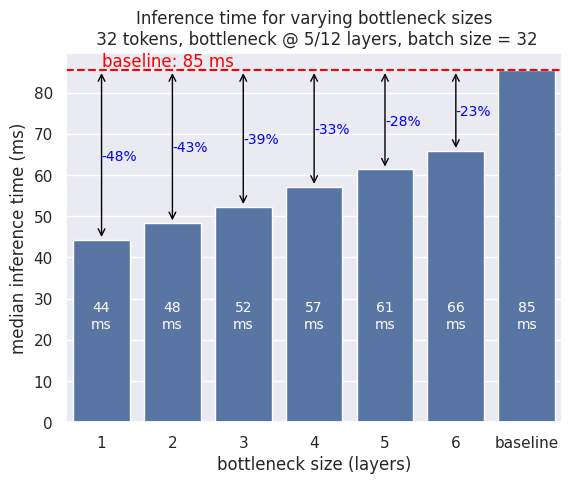

In [88]:
ax = sns.barplot(x=x, y=y)

plt.xlabel("bottleneck size (layers)")
plt.ylabel("median inference time (ms)")
plt.title(
    "Inference time for varying bottleneck sizes\n 32 tokens, bottleneck @ 5/12 layers, batch size = 32"
)
plt.axhline(y[-1], color="red", linestyle="--")
# Add label above the horizontal line
plt.text(
    0,
    y[-1],
    f"baseline: {y[-1]:.0f} ms",
    ha="left",
    va="bottom",
    color="red",
    fontsize=12,
)

# Add labels in the middle of the bars
for i, (v, v_perc) in enumerate(zip(y, y_perc)):
    ax.annotate(
        f"{v:.0f}\nms",
        xy=(i, min(y) / 2),
        ha="center",
        va="bottom",
        color="white",
        fontsize=10,
    )

    if i < len(x) - 1 and v_perc < -2:
        ax.annotate(
            "",
            xy=(i, v),
            xytext=(i, y[-1]),
            arrowprops=dict(arrowstyle="<->", color="black"),
        )
        ax.annotate(
            f"{v_perc:.0f}%",
            xy=(i + 0.25, ((y[-1] - v) / 2) + v - 2),
            ha="center",
            va="bottom",
            color="blue",
            fontsize=10,
        )

In [89]:
x = np.array([*bn_sizes_comp32["bottleneck_size"].tolist(), "baseline"])
y = np.array([*bn_sizes_comp32["Median (ms)"].tolist(), dinovitb["Median (ms)"]])
acc = np.array([None for _ in x])
acc[2] = 81
acc[5] = 81
acc[-1] = 84
x, y, acc

(array(['1', '2', '3', '4', '5', '6', 'baseline'], dtype='<U21'),
 array([44.28325999, 48.337542  , 52.298097  , 57.1786985 , 61.364515  ,
        65.883225  , 85.4360775 ]),
 array([None, None, 81, None, None, 81, 84], dtype=object))

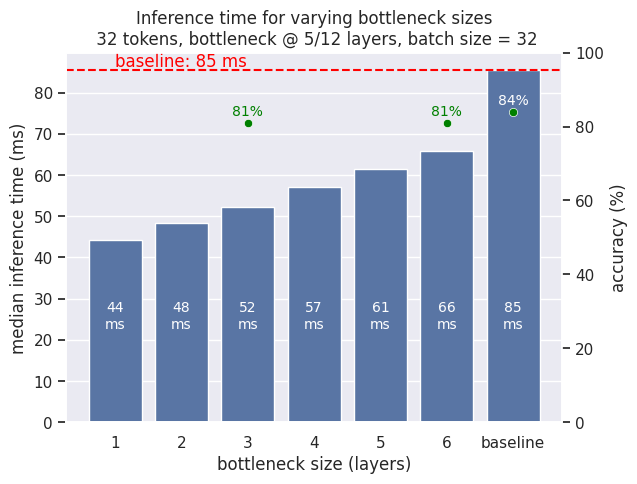

In [91]:
ax = sns.barplot(x=x, y=y)


plt.xlabel("bottleneck size (layers)")
plt.ylabel("median inference time (ms)")
plt.title(
    "Inference time for varying bottleneck sizes\n 32 tokens, bottleneck @ 5/12 layers, batch size = 32"
)
plt.axhline(y[-1], color="red", linestyle="--")
# Add label above the horizontal line
plt.text(
    0,
    y[-1],
    f"baseline: {dinovitb['Median (ms)']:.0f} ms",
    ha="left",
    va="bottom",
    color="red",
    fontsize=12,
)

ax2 = ax.twinx()
ax2.set_ylim(0, 100)
ax2.grid(False)
ax2.set_ylabel("accuracy (%)")
sns.scatterplot(x=x, y=acc, ax=ax2, color="green")

for i, (v, v_perc) in enumerate(zip(y, y_perc)):
    ax.annotate(
        f"{v:.0f}\nms",
        xy=(i, min(y) / 2),
        ha="center",
        va="bottom",
        color="white",
        fontsize=10,
    )


for i, ac in enumerate(acc):
    if ac is not None:
        if i == len(x) - 1:
            ax2.annotate(
                f"{ac}%",
                xy=(x[i], ac + 1.25),
                ha="center",
                va="bottom",
                color="white",
                fontsize=10,
            )
        else:
            ax2.annotate(
                f"{ac}%",
                xy=(x[i], ac + 1.25),
                ha="center",
                va="bottom",
                color="green",
                fontsize=10,
            )

# Exited Models

In [3]:
dino_exited = pd.read_csv(
    "./ablations/exited/NVIDIAGeForceRTX4070Ti_exited_dinov2vitb14_bs32_.csv"
)
tome_exited = pd.read_csv(
    "./ablations/exited/NVIDIAGeForceRTX4070Ti_tome_dinov2vitb14_r24bs32_.csv"
)

In [4]:
x = [0, *dino_exited["exit_at"].to_list()]
y_dino = [0, *dino_exited["Median (ms)"].to_list()]
y_tome = [0, *tome_exited["Median (ms)"].to_list()]

In [5]:
y_dino[6]

44.33145599614363

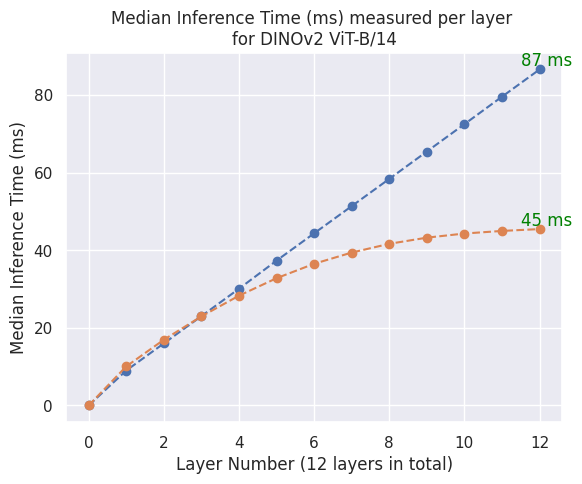

In [10]:
plt.plot(x, y_dino, marker="o", linestyle="--", label="Baseline")
plt.plot(x, y_tome, marker="o", linestyle="--", label="ToMe")
plt.xlabel("Layer Number (12 layers in total)")
plt.ylabel("Median Inference Time (ms)")
plt.title("Median Inference Time (ms) measured per layer \nfor DINOv2 ViT-B/14")


# plt.axhline(y_dino[-1], color="red", linestyle="--")
plt.text(
    11.5,
    y_dino[-1],
    f"{y_dino[-1]:.0f} ms",
    ha="left",
    va="bottom",
    color="green",
    fontsize=12,
)
plt.text(
    11.5,
    y_tome[-1],
    f"{y_tome[-1]:.0f} ms",
    ha="left",
    va="bottom",
    color="green",
    fontsize=12,
)
plt.show()

# LaTeX Tables

In [29]:
baselines = pd.read_csv(
    "./ablations/baselines/NVIDIAGeForceRTX4070Ti_dinov2_bs32_.csv", index_col=0
)

In [30]:
print(
    baselines.round(1).to_latex(
        formatters={
            "Parameters": "{:,.0f}".format,
            "Mean (ms)": "{:.1f}".format,
            "Median (ms)": "{:.1f}".format,
            "IQR (ms)": "{:.1f}".format,
        }
    )
)

\begin{tabular}{lrrrrrr}
\toprule
 & Parameters & Depth & Embedding Dim & Mean (ms) & Median (ms) & IQR (ms) \\
\midrule
0 & 22,056,576 & 12 & 384 & 27.0 & 26.9 & 0.1 \\
1 & 86,580,480 & 12 & 768 & 85.4 & 85.4 & 0.2 \\
2 & 304,368,640 & 24 & 1024 & 284.5 & 284.4 & 3.4 \\
3 & 1,136,480,768 & 40 & 1536 & 1000.0 & 996.5 & 5.9 \\
\bottomrule
\end{tabular}



In [34]:
tome_baselines = pd.read_csv(
    "./ablations/baselines/NVIDIAGeForceRTX4070Ti_tome_dinov2vitb14_bs32_.csv",
    index_col=0
)

In [35]:
tome_baselines

,Parameters,Depth,Embedding Dim,r,Mean (ms),Median (ms),IQR (ms),final_tokens
0,86580480,12,768,2,94.480675,94.437807,0.255840,233
1,86580480,12,768,3,92.135938,92.117740,0.205634,221
2,86580480,12,768,4,90.032994,89.981088,0.234822,209
3,86580480,12,768,5,87.072758,87.040801,0.230416,197
4,86580480,12,768,6,84.730620,84.639603,0.217257,185
5,86580480,12,768,7,82.235511,82.168437,0.175854,173
6,86580480,12,768,8,80.168228,80.105313,0.205456,161
7,86580480,12,768,9,77.414736,77.372861,0.190705,149
8,86580480,12,768,10,74.665920,74.627398,0.169530,137
9,86580480,12,768,11,72.869826,72.845753,0.212156,125


# Effect of Depth

In [7]:
vit_l_acc_lat = pd.read_excel("compvit-latency.xlsx", sheet_name="large tome acc, lat")
vit_b_acc_lat = pd.read_excel("compvit-latency.xlsx", sheet_name="base tome acc, lat")

In [31]:
vit_l_acc_lat

,r,latency (median),accuracy (top1),accuracy (top5),latency %,accuracy % (top1),accuracy % (top5),latency norm,accuracy norm (top1),accuracy norm (top5)
0,8,192.681064,84.366000,96.972001,-0.322494,-0.020367,-0.006312,0.677506,0.979633,0.993688
1,9,177.899684,83.355999,96.575999,-0.374468,-0.032095,-0.010370,0.625532,0.967905,0.989630
2,10,164.983044,81.352001,95.840001,-0.419886,-0.055365,-0.017912,0.580114,0.944635,0.982088
3,11,151.857532,70.605999,90.236002,-0.466038,-0.180144,-0.075337,0.533962,0.819856,0.924663
4,12,141.447666,22.766000,37.884000,-0.502641,-0.735648,-0.611797,0.497359,0.264352,0.388203
5,13,130.603317,2.574000,6.176000,-0.540772,-0.970111,-0.936714,0.459228,0.029889,0.063286
6,14,122.748143,0.408000,1.554000,-0.568392,-0.995262,-0.984076,0.431608,0.004738,0.015924
7,15,115.644592,0.210000,0.922000,-0.593370,-0.997562,-0.990552,0.406630,0.002438,0.009448
8,16,109.697364,0.222000,0.864000,-0.614281,-0.997422,-0.991146,0.385719,0.002578,0.008854
9,17,102.495565,0.220000,0.914000,-0.639605,-0.997445,-0.990634,0.360395,0.002555,0.009366


In [8]:
vit_b_acc_lat

,r,latency (median),accuracy (top1),accuracy (top5),latency %,accuracy % (top1),accuracy % (top5),latency norm,accuracy norm (top1),accuracy norm (top5)
0,2,74.828238,84.072000,96.806002,-0.124294,-0.002468,-0.000392,0.875706,0.997532,0.999608
1,3,73.119593,84.028000,96.771997,-0.144290,-0.002990,-0.000743,0.855710,0.997010,0.999257
2,4,71.066396,83.980000,96.762002,-0.168319,-0.003560,-0.000847,0.831681,0.996440,0.999153
3,5,67.877472,83.921999,96.796000,-0.205638,-0.004248,-0.000496,0.794362,0.995752,0.999504
4,6,66.144886,83.762002,96.688002,-0.225914,-0.006146,-0.001611,0.774086,0.993854,0.998389
5,7,63.537583,83.612001,96.679997,-0.256427,-0.007926,-0.001693,0.743573,0.992074,0.998307
6,8,61.998273,83.538002,96.644002,-0.274442,-0.008804,-0.002065,0.725558,0.991196,0.997935
7,9,59.453742,83.512002,96.582001,-0.304220,-0.009112,-0.002705,0.695780,0.990888,0.997295
8,10,57.368026,83.275998,96.543998,-0.328629,-0.011913,-0.003098,0.671371,0.988087,0.996902
9,11,54.729908,83.153999,96.464002,-0.359502,-0.013360,-0.003924,0.640498,0.986640,0.996076


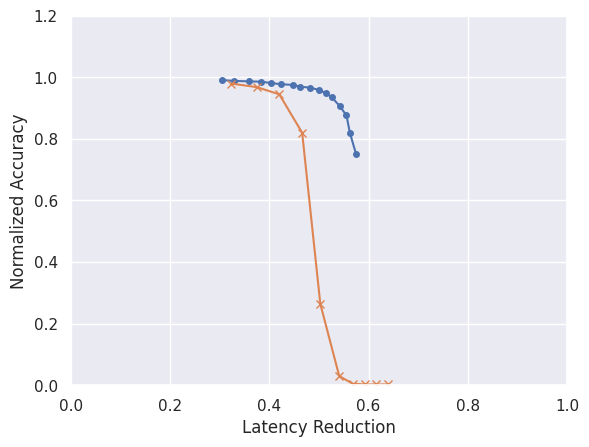

In [37]:

# Data for the line plot
x_b = vit_b_acc_lat["latency %"].abs().tolist()[7:-1]
y_b = vit_b_acc_lat["accuracy norm (top1)"].tolist()[7:-1]

x_l = vit_l_acc_lat["latency %"].abs().tolist()[:-1]
y_l = vit_l_acc_lat["accuracy norm (top1)"].tolist()[:-1]

# Create the line plot
plt.plot(x_b, y_b, label="Base ViT", marker="o", markersize=4)
plt.plot(x_l, y_l, label="Large ViT", marker="x")
# Set the axis labels
plt.xlabel("Latency Reduction")
plt.ylabel("Normalized Accuracy")

# Set the axis ranges
plt.xlim(0, 1)
plt.ylim(0, 1.2)
plt.show()

In [34]:
x_b[6:]

[0.2744416817365912,
 0.30422002160727113,
 0.3286289046020718,
 0.3595024815722121,
 0.3832002685566518,
 0.40279793915295675,
 0.4230796269431141,
 0.4473875142724768,
 0.46117774207655915,
 0.48281901127784815,
 0.49930252880680287,
 0.5141870706880826,
 0.5253151336910582,
 0.5415892222370529,
 0.5553644126120257,
 0.5624411377858691,
 0.5744122940917101]